# Perceval Quest
#### Author: *Valentin Deumier*

Our goal is to start by creating a 'classical' neural network and train it on the famous MNIST handwritten digits dataset, and then try to upgrade it by using Linear Optical Quantum Computing, in hope to increase the accuracy of the model and lower the duration of training.

### <u>1: A classical convolutional NN on the reduced MNIST data set</u>

Let's first start by loading the librairies and visualize the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

In [2]:
# Parameters
IMG_SIZE = 28
NUM_CLASSES = 10
BATCH_SIZE = 200
EPOCHS = 15

Train data shape: (6000, 785)
Validation data shape: (1000, 785)
label
1    11.60
3    10.60
6    10.45
7    10.40
2    10.03
8     9.60
4     9.58
9     9.35
0     9.28
5     9.10
Name: count, dtype: float64
Max difference of proportion between full and subset datasets: 0.59 %


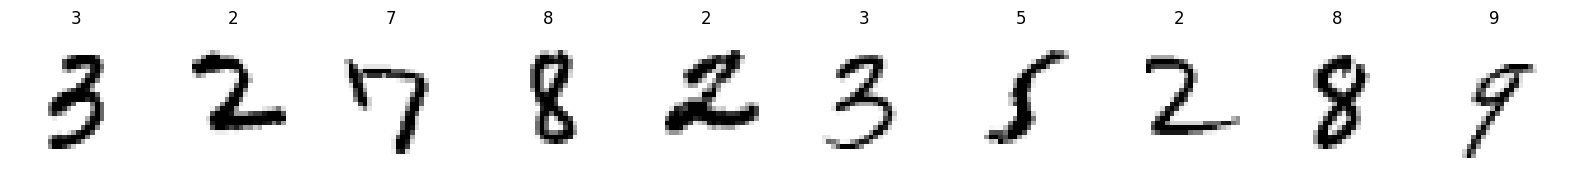

In [3]:
# Import the dataset
train_data = pd.read_csv('mnist_train.csv')
val_data = pd.read_csv('mnist_test.csv')
set_proportions = np.round(train_data['label'].value_counts()/len(train_data)*100, 2)

# Select a subset of the dataset
train_data = train_data.sample(frac=0.1, random_state=1)      # 10% of the data, random_state=1 for reproducibility
val_data = val_data.sample(frac=0.1, random_state=1)
print('Train data shape:', train_data.shape)
print('Validation data shape:', val_data.shape)

# Check proportion of each class
subset_proportions = np.round(train_data['label'].value_counts()/len(train_data)*100, 2)
print(subset_proportions)
print('Max difference of proportion between full and subset datasets:', np.round(np.max(np.abs(set_proportions - subset_proportions)), 2), '%')    
# Proportions are similar between the full and subset datasets

# Extract the features and labels
X_train = train_data.iloc[:, 1:].values.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255
y_train = train_data.iloc[:, 0].values
X_val = val_data.iloc[:, 1:].values.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255
y_val = val_data.iloc[:, 0].values

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

# Visualize the training data

def plot_digits(digits, labels, num_digits=10):
    fig, axes = plt.subplots(1, num_digits, figsize=(20, 20))
    for i in range(num_digits):
        axes[i].imshow(digits[i], cmap='gray_r')
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

plot_digits(X_train, y_train.argmax(axis=1))

We build the CNN using TensorFlow.

In [4]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

# Evaluate the model
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

c:\Users\valen\OneDrive\Bureau\LOQC MNIST\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.2516 - loss: 2.1635 - val_accuracy: 0.6770 - val_loss: 1.1820
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.7131 - loss: 0.9630 - val_accuracy: 0.8470 - val_loss: 0.5478
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8556 - loss: 0.4793 - val_accuracy: 0.8960 - val_loss: 0.3715
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.8970 - loss: 0.3399 - val_accuracy: 0.9180 - val_loss: 0.2910
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.9223 - loss: 0.2668 - val_accuracy: 0.9250 - val_loss: 0.2591
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9408 - loss: 0.2076 - val_accuracy: 0.9320 - val_loss: 0.2235
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9489 - loss: 0.1755 - val_accuracy: 0.9390 - val_loss: 0.1716
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9563 - loss: 0.1474 - val_accuracy: 0

We can see that the model has a high accuracy on the test set. Let's visualize the digits that it gets wrong.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


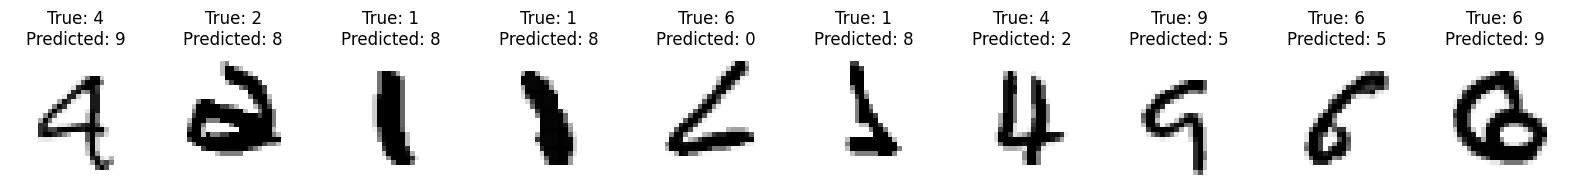

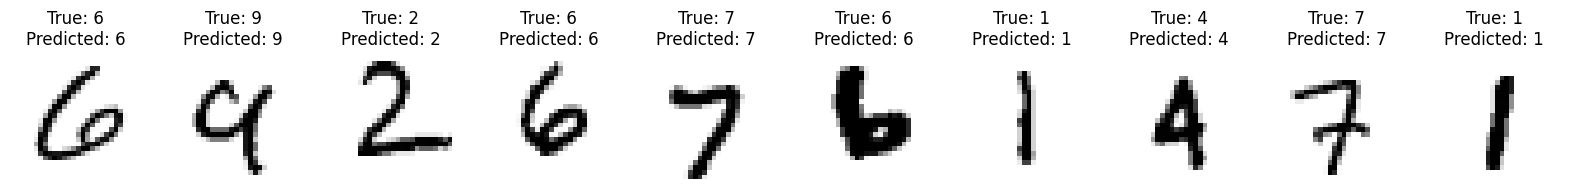

In [5]:
# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Identify the indices where the predictions are incorrect
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Identify the indices where the predictions are correct
correct_indices = np.where(y_pred_classes == y_true)[0]

# Display some of the incorrect predictions
def plot_wrong_digits(digits, labels, num_digits=10):
    fig, axes = plt.subplots(1, num_digits, figsize=(20, 20))
    for i in range(num_digits):
        axes[i].imshow(digits[i], cmap='gray_r')
        axes[i].set_title('True: {}\nPredicted: {}'.format(labels[i], y_pred_classes[incorrect_indices[i]]))
        axes[i].axis('off')
    plt.show()

# Display some of the correct predictions
def plot_correct_digits(digits, labels, num_digits=10):
    fig, axes = plt.subplots(1, num_digits, figsize=(20, 20))
    for i in range(num_digits):
        axes[i].imshow(digits[i], cmap='gray_r')
        axes[i].set_title('True: {}\nPredicted: {}'.format(labels[i], y_pred_classes[correct_indices[i]]))
        axes[i].axis('off')
    plt.show()

plot_wrong_digits(X_val[incorrect_indices], y_true[incorrect_indices])
plot_correct_digits(X_val[correct_indices], y_true[correct_indices])

Just for testing purposes, let's try to draw our own digits and give it to the model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


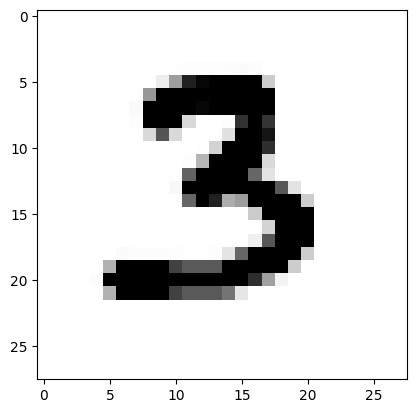

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [8]:
import tkinter as tk

class DrawDigits:
    def __init__(self, master):
        self.master = master
        self.canvas = tk.Canvas(master, width=IMG_SIZE*10, height=IMG_SIZE*10, bg='white')
        self.canvas.pack()
        self.canvas.bind("<B1-Motion>", self.paint)
        self.image = np.zeros((IMG_SIZE, IMG_SIZE))
        self.button = tk.Button(master, text="Predict", command=self.predict)
        self.button.pack()
        self.clear_button = tk.Button(master, text="Clear", command=self.clear)
        self.clear_button.pack()
        self.show_button = tk.Button(master, text="Show Image", command=self.show_image)
        self.show_button.pack()
        self.label = tk.Label(master, text="")
        self.label.pack()

    def paint(self, event):
        x, y = event.x, event.y
        self.canvas.create_rectangle(x-10, y-10, x+10, y+10, fill='black')
        for i in range(-2, 2):      # Draw a thicker line with a Gaussian distribution
            for j in range(-2, 2):
                if 0 <= x//10 + i < IMG_SIZE and 0 <= y//10 + j < IMG_SIZE:
                    self.image[y//10 + j, x//10 + i] += np.exp(-(i**2 + j**2)*1.5)
        np.clip(self.image, 0, 1, out=self.image)

    def predict(self):
        self.image = self.image.reshape(1, IMG_SIZE, IMG_SIZE, 1)
        prediction = model.predict(self.image)
        self.label.config(text=f"Predicted Digit: {np.argmax(prediction)} with confidence {np.max(prediction)*100:.2f}%")
        self.image = self.image.reshape(IMG_SIZE, IMG_SIZE)

    def clear(self):
        self.canvas.delete("all")
        self.image = np.zeros((IMG_SIZE, IMG_SIZE))

    def show_image(self):
        plt.imshow(self.image, cmap='gray_r')
        plt.show()

root = tk.Tk()
drawer = DrawDigits(root)
root.mainloop()